In [1]:
import pandas as pd
import re
import requests
from nltk.util import bigrams


In [2]:
df = pd.read_csv('sentences_521_features_46.csv')
df = df.drop(columns=['no_change'])
df

,sentence,mdd,t_depth,summarizing,bigrams,words,letters,word_avg,numbers,symbols,...,RB,CC,AT,QW,REL,PRP,IN,DTT,DT,MD
0,והנפיחות בעיניים?,3.75,4,0,1,2,15,7.500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",14.82,34,1,25,25,130,5.200,0,4,...,2,2,0,0,0,0,0,0,0,0
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,14.41,28,1,19,21,99,4.714,0,3,...,0,2,2,2,2,4,2,0,0,0
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,18.42,36,1,25,26,126,4.846,0,2,...,2,2,2,0,2,0,4,2,0,0
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",19.70,43,1,24,24,139,5.792,0,8,...,0,0,0,2,4,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",16.91,33,1,22,24,122,5.083,0,2,...,0,0,2,0,8,2,6,0,0,0
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,7.17,15,1,11,12,62,5.167,0,4,...,2,0,2,0,0,0,0,0,0,2
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",13.08,25,1,18,19,92,4.842,0,4,...,0,0,0,0,0,0,4,0,0,2
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,5.27,12,1,7,8,37,4.625,0,1,...,0,0,2,0,0,0,0,0,0,2


In [3]:
stopwords = ['אני','את','אתה','אנחנו','אתן','אתם','הם','הן','היא','הוא','שלי','שלו','שלך','שלה','שלנו','שלכם','שלכן','שלהם','שלהן','לי',
'לו','לה','לנו','לכם','לכן','להם','להן','אותה','אותו','זה','זאת','אלה','אלו','תחת','מתחת','מעל','בין','עם','עד','נגר','על','אל','מול','של',
'אצל','כמו','אחר','אותו','בלי','לפני','אחרי','מאחורי','עלי','עליו','עליה','עליך','עלינו','עליכם','לעיכן','עליהם','עליהן','כל','כולם','כולן','כך',
'ככה','כזה','זה','זות','אותי','אותה','אותם','אותך','אותו','אותן','אותנו','ואת','את','אתכם','אתכן','איתי','איתו','איתך','איתה','איתם','איתן',
'איתנו','איתכם','איתכן','יהיה','תהיה','היתי','היתה','היה','להיות','עצמי','עצמו','עצמה','עצמם','עצמן','עצמנו','עצמהם','עצמהן','מי','מה','איפה',
'היכן','אם','לאן','איזה','מהיכן','איך','כיצד','מתי','כאשר','כש','למרות',
'לפני','אחרי','למה','מדוע','כי','יש','אין','אך','מנין','מאין','מאיפה','יכל','יכלה','יכלו','יכול','יכולה','יכולים','יכולות','יוכלו','יוכל','מסוגל',
'לא','רק','אולי','אין','לאו','אי','כלל','נגד','אם','עם','אל','אלה','אלו','אף','על','מעל','מתחת','מצד','בשביל','לבין','באמצע','בתוך','דרך',
'מבעד','באמצעות','למעלה','למטה','מחוץ','מן','לעבר','מכאן','כאן','הנה','הרי','פה','שם','אך','ברם','שוב','אבל','מבלי','בלי','מלבד','רק',
'בגלל','מכיוון','עד','אשר','ואילו','למרות','כמו','כפי','אז','אחרי','כן','לכן','לפיכך','מאד','מעט','מעטים','במידה','שוב','יותר','מדי','גם','כן',
'נו','אחר','אחרת','אחרים','אחרות','אשר','או']
len(stopwords)

211

In [4]:
num_of_stopwords = []
for s in df.sentence:
    spl = s.split()
    n = 0
    for w in spl:
        if w in stopwords:
            n = n + 1
    num_of_stopwords.append(n)
    
    
df['stopwords'] = num_of_stopwords
df

,sentence,mdd,t_depth,summarizing,bigrams,words,letters,word_avg,numbers,symbols,...,CC,AT,QW,REL,PRP,IN,DTT,DT,MD,stopwords
0,והנפיחות בעיניים?,3.75,4,0,1,2,15,7.500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",14.82,34,1,25,25,130,5.200,0,4,...,2,0,0,0,0,0,0,0,0,2
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,14.41,28,1,19,21,99,4.714,0,3,...,2,2,2,2,4,2,0,0,0,4
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,18.42,36,1,25,26,126,4.846,0,2,...,2,2,0,2,0,4,2,0,0,4
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",19.70,43,1,24,24,139,5.792,0,8,...,0,0,2,4,2,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",16.91,33,1,22,24,122,5.083,0,2,...,0,2,0,8,2,6,0,0,0,2
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,7.17,15,1,11,12,62,5.167,0,4,...,0,2,0,0,0,0,0,0,2,1
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",13.08,25,1,18,19,92,4.842,0,4,...,0,0,0,0,0,4,0,0,2,0
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,5.27,12,1,7,8,37,4.625,0,1,...,0,2,0,0,0,0,0,0,2,1


In [5]:
df2 = pd.read_csv('sentences617.csv')
df2

,sentence,mdd,t_depth,summarizing,bigrams,words,letters,word_avg,numbers,symbols,...,CC,AT,QW,REL,PRP,IN,DTT,DT,MD,stopwords
0,"בחופשת הקיץ, עידן החליט לעבוד.",3.50,6,0,4,5,24,4.800,0,2,...,0,0,0,0,0,0,0,0,0,0
1,החברים שלו נסעו לים והלכו לבלות אבל הוא רצה לע...,7.46,14,0,9,10,40,4.000,0,1,...,2,0,0,0,2,0,0,0,0,3
2,עידן רצה לעבוד בטלוויזיה.,3.40,6,0,3,4,21,5.250,0,1,...,0,0,0,0,0,0,0,0,0,0
3,הוא מאוד אוהב את תחום הטלוויזיה.,4.17,7,0,5,6,26,4.333,0,1,...,0,2,0,0,2,0,0,0,0,2
4,עכשיו צהריים.,2.00,2,0,1,2,11,5.500,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,לספר לו את האמת?,2.80,6,0,3,4,12,3.000,0,1,...,0,2,0,0,0,2,0,0,0,2
613,לגלות לו שהייתי בטוחה שהוא מישהו אחר?,4.25,8,0,6,7,30,4.286,0,1,...,0,0,0,2,2,2,0,0,0,1
614,"תמר, תעני לי, מה לעשות אם הוא\nיציע פגישה?""",5.25,9,0,8,9,30,3.333,0,5,...,2,0,2,0,0,2,0,0,0,3
615,"תמר חייכה: ""נטע, אחרי מה שעברת היום, יש לי הרג...",11.55,22,0,17,18,65,3.611,0,6,...,0,4,2,4,0,6,0,0,2,6


In [6]:
df3 = df.append(df2, ignore_index=True)
#df3 = df3[:600]
df3

C:\Users\jenga\AppData\Local\Temp\ipykernel_6340\2626009892.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2, ignore_index=True)


,sentence,mdd,t_depth,summarizing,bigrams,words,letters,word_avg,numbers,symbols,...,CC,AT,QW,REL,PRP,IN,DTT,DT,MD,stopwords
0,והנפיחות בעיניים?,3.75,4,0,1,2,15,7.500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",14.82,34,1,25,25,130,5.200,0,4,...,2,0,0,0,0,0,0,0,0,2
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,14.41,28,1,19,21,99,4.714,0,3,...,2,2,2,2,4,2,0,0,0,4
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,18.42,36,1,25,26,126,4.846,0,2,...,2,2,0,2,0,4,2,0,0,4
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",19.70,43,1,24,24,139,5.792,0,8,...,0,0,2,4,2,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,לספר לו את האמת?,2.80,6,0,3,4,12,3.000,0,1,...,0,2,0,0,0,2,0,0,0,2
1134,לגלות לו שהייתי בטוחה שהוא מישהו אחר?,4.25,8,0,6,7,30,4.286,0,1,...,0,0,0,2,2,2,0,0,0,1
1135,"תמר, תעני לי, מה לעשות אם הוא\nיציע פגישה?""",5.25,9,0,8,9,30,3.333,0,5,...,2,0,2,0,0,2,0,0,0,3
1136,"תמר חייכה: ""נטע, אחרי מה שעברת היום, יש לי הרג...",11.55,22,0,17,18,65,3.611,0,6,...,0,4,2,4,0,6,0,0,2,6


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

ttw = df3
ttw=ttw.fillna("")
ttw.dropna(inplace=True)
ttw2 = ttw.copy()
five_ttw=ttw2['sentence'].tolist()


# from sklearn.feature_extraction.text import TfidfVectorizer
#first_time = datetime.now() 

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(five_ttw)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
#first_time_final = datetime.now() - first_time
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_time_final))
df

C:\Users\jenga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,08,10,100,11,12,126,13,14,...,תשלום,תשלומים,תשלמו,תשמש,תת,תתבצע,תתבקש,תתכנס,תתקבל,תתקדמי
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.239952,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [8]:
from sklearn.metrics.pairwise import linear_kernel

#first_cos_time = datetime.now() 

cosine_similarities = linear_kernel(vectors)

#first_cos_time_final = datetime.now() - first_cos_time
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))
pd.DataFrame(cosine_similarities, index = five_ttw, columns = five_ttw)


,והנפיחות בעיניים?,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סימנים חריגים דוגמת קוצר נשימה במאמץ, כאבים בלתי אופייניים בחזה - ולא להסס ולפנות להתייעצות רפואית או לעזרה רפואית.","הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקויים הרפואיים שאתה סובל מהם, וכיצד הם משפיעים על אורך חייך והתפקוד היום-יומי.","מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים המיוחדים בחינוך הרגיל, לפיכך הפניית תלמיד לחינוך מיוחד תיערך רק לאחר שמוצו כל אפשרויות הטיפול בחינוך הרגיל.","בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופיו, ההיסטוריה הרפואית האישית, התרופות הקבועות שאותן נוטלים, אלרגיות שונות שמהן סובלים, המצב החיסוני – וכל המשתנים הרלוונטיים.","מי שלא מלאו לו 20, יכול להיות זכאי לדמי אבטלה במקרים מסוימים - למידע נוסף לחצו כאן.","אתה תושב השטחים בעל תעודת זהות ישראלית, ונפגעת בתחום הקו הירוק.","אצטדיון ספורט, למעט במקומות שהוקצו לעישון בידי הנהלת האצטדיון, אם הוקצו, כמפורט בחוק.",לעיתים העור של התינוק יבש ונוטה לקילוף.,"טיפול התפתחותי לילד - התהליך המלא עם הגעתכם לרופא הילדים (בעקבות המלצה של גורם מקצועי או בשל חששות שהתעוררו אצלכם), יבחן הרופא את השאלונים שבידיכם, יקשיב לבקשתכם ויחליט אם להפנות את הילד לאבחון.",...,"נטע פתחה את הפה בהפתעה: \n""אז מי היה הנועם ההוא, שישב בפיצרייה בחמש, עם משקפיים וג'ינס?","אני הייתי בטוחה שהוא הנועם שלךְ"".","תמר צחקה: ""עכשיו את מבינה למה הוא לא הבין כשהתנפלת עליו?""","נטע הֶחְוִירה (הפנים שלה נהיו לבנות): ""והשארתי לו את מספר הטלפון שלי.""","""איזו פדיחה...תמר, מה אני אעשה אם הוא יצלצל?",לספר לו את האמת?,לגלות לו שהייתי בטוחה שהוא מישהו אחר?,"תמר, תעני לי, מה לעשות אם הוא\nיציע פגישה?""","תמר חייכה: ""נטע, אחרי מה שעברת היום, יש לי הרגשה שאת כבר לא צריכה \nאותי בתור מדריכה שלך.","אם עברת את זה ונשארת בחיים, אני בטוחה \nשתצליחי להסתדר לבד""."
והנפיחות בעיניים?,1.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סימנים חריגים דוגמת קוצר נשימה במאמץ, כאבים בלתי אופייניים בחזה - ולא להסס ולפנות להתייעצות רפואית או לעזרה רפואית.",0.0,1.00000,0.010420,0.000000,0.0,0.020926,0.000000,0.00000,0.0,0.008581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקויים הרפואיים שאתה סובל מהם, וכיצד הם משפיעים על אורך חייך והתפקוד היום-יומי.",0.0,0.01042,1.000000,0.006172,0.0,0.000000,0.000000,0.00000,0.0,0.022181,...,0.008173,0.000000,0.011610,0.010586,0.000000,0.020193,0.000000,0.000000,0.045827,0.010776
"מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים המיוחדים בחינוך הרגיל, לפיכך הפניית תלמיד לחינוך מיוחד תיערך רק לאחר שמוצו כל אפשרויות הטיפול בחינוך הרגיל.",0.0,0.00000,0.006172,1.000000,0.0,0.000000,0.042463,0.00000,0.0,0.029636,...,0.006960,0.000000,0.009887,0.009015,0.000000,0.017196,0.000000,0.000000,0.000000,0.009176
"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופיו, ההיסטוריה הרפואית האישית, התרופות הקבועות שאותן נוטלים, אלרגיות שונות שמהן סובלים, המצב החיסוני – וכל המשתנים הרלוונטיים.",0.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
לספר לו את האמת?,0.0,0.00000,0.020193,0.017196,0.0,0.085157,0.000000,0.00000,0.0,0.033256,...,0.022773,0.000000,0.032349,0.129861,0.000000,1.000000,0.127996,0.000000,0.000000,0.030023
לגלות לו שהייתי בטוחה שהוא מישהו אחר?,0.0,0.00000,0.000000,0.000000,0.0,0.056936,0.000000,0.00000,0.0,0.000000,...,0.000000,0.264880,0.000000,0.067104,0.000000,0.127996,1.000000,0.000000,0.000000,0.105347
"תמר, תעני לי, מה לעשות אם הוא\nיציע פגישה?""",0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.03383,0.0,0.021609,...,0.000000,0.000000,0.123308,0.000000,0.224635,0.000000,0.000000,1.000000,0.151288,0.039016
"תמר חייכה: ""נטע, אחרי מה שעברת היום, יש לי הרגשה שאת כבר לא צריכה \nאותי בתור מדריכה שלך.",0.0,0.00000,0.045827,0.000000,0.0,0.000000,0.000000,0.00000

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [10]:
X = df3['sentence']
y = df3['summarizing']

#first_cos_time = datetime.now() 
#TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

#first_cos_time_final = datetime.now() - first_cos_time
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))

In [11]:

# ComplementNB standard multinomial naive Bayes (MNB) algorithm 
#time1 = datetime.now() 

clf = ComplementNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
comp_score = accuracy_score(y_test, y_pred)
print(comp_score)
#time1 = datetime.now() - time1
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time1))



#time2 = datetime.now() 
# MultinomialNB naive Bayes algorithm for multinomially distributed data

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_dtm, y_train)
y_pred = clf_mnb.predict(X_test_dtm)
mnb_score = accuracy_score(y_test, y_pred)
print(mnb_score)
#time2 = datetime.now() - time2
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time2))

0.9403508771929825
0.8982456140350877


In [12]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [13]:
#time3 = datetime.now() 
# BernoulliNB multivariate Bernoulli distributions


clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
bern_score = accuracy_score(y_test, y_pred)
print(bern_score)
#time3 = datetime.now() - time3
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time3))



#time4 = datetime.now() 
# Gaussian Naive Bayes algorithm for classification

gausnb = GaussianNB()
gausnb.fit(X_train_dtm.toarray(), y_train)
y_pred = gausnb.predict(X_test_dtm.toarray())
gausnb_score = accuracy_score(y_test, y_pred)
print(gausnb_score)
#time4 = datetime.now() - time4
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time4))

0.7614035087719299
0.9298245614035088


In [14]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [15]:
from sklearn.linear_model import LogisticRegression
#time6 = datetime.now() 

clf = LogisticRegression(random_state=0)
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)
#time6 = datetime.now() - time6
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time6))

0.9157894736842105


In [16]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [17]:
y = df3['summarizing']
X = df3.drop(['sentence', 'summarizing'], axis=1)
X

,mdd,t_depth,bigrams,words,letters,word_avg,numbers,symbols,if_question,punctuation,...,CC,AT,QW,REL,PRP,IN,DTT,DT,MD,stopwords
0,3.75,4,1,2,15,7.500,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,14.82,34,25,25,130,5.200,0,4,0,3,...,2,0,0,0,0,0,0,0,0,2
2,14.41,28,19,21,99,4.714,0,3,0,2,...,2,2,2,2,4,2,0,0,0,4
3,18.42,36,25,26,126,4.846,0,2,0,2,...,2,2,0,2,0,4,2,0,0,4
4,19.70,43,24,24,139,5.792,0,8,0,7,...,0,0,2,4,2,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2.80,6,3,4,12,3.000,0,1,1,1,...,0,2,0,0,0,2,0,0,0,2
1134,4.25,8,6,7,30,4.286,0,1,1,1,...,0,0,0,2,2,2,0,0,0,1
1135,5.25,9,8,9,30,3.333,0,5,0,3,...,2,0,2,0,0,2,0,0,0,3
1136,11.55,22,17,18,65,3.611,0,6,0,4,...,0,4,2,4,0,6,0,0,2,6


In [18]:

# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
train_for_graph = []
test_for_graph = []
models_names_graph = []

In [21]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('SVC')
print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9308323563892146
test_acc:  0.9017543859649123


In [22]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=1000).fit(X_train, y_train)
#clf.score(X_test, y_test)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('HistGradientBoostingClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

C:\Users\jenga\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
train_acc:  1.0
test_acc:  0.856140350877193


In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('GaussianNB')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
train_acc:  0.8218053927315357
test_acc:  0.7824561403508772


In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=1, max_depth=9)
clf = clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)


train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('DecisionTreeClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  0.9894490035169988
test_acc:  0.8210526315789474


In [25]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=400).fit(X_train, y_train)
clf.predict_proba(X_test)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('MLPClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  0.9894490035169988
test_acc:  0.8771929824561403


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))
test_pred = neigh.predict(X_test)
train_pred = neigh.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('KNeighborsClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9085580304806565
test_acc:  0.8701754385964913


In [27]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X_train, y_train)

print(gpc.predict(X_test))
test_pred = gpc.predict(X_test)
train_pred = gpc.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('GaussianProcessClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

C:\Users\jenga\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9249706916764361
test_acc:  0.8982456140350877


In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('RandomForestClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)


[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  1.0
test_acc:  0.887719298245614


In [29]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=30, random_state=0)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('AdaBoostClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)


[0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9343493552168816
test_acc:  0.8912280701754386


In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('QuadraticDiscriminantAnalysis')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
train_acc:  0.735052754982415
test_acc:  0.7052631578947368


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('LogisticRegression')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9331770222743259
test_acc:  0.8947368421052632


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('GradientBoostingClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9671746776084408
test_acc:  0.8982456140350877


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('LinearDiscriminantAnalysis')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9073856975381008
test_acc:  0.8912280701754386


In [34]:
from sklearn.ensemble import ExtraTreesClassifier


clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('ExtraTreesClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  1.0
test_acc:  0.8982456140350877


In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=9, random_state=0).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('BaggingClassifier/SVC')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8886283704572099
test_acc:  0.856140350877193


In [36]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('OneVsOneClassifier/LinearSVC')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  0.902696365767878
test_acc:  0.8666666666666667


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = OutputCodeClassifier(estimator=RandomForestClassifier(random_state=0), random_state=0).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('OutputCodeClassifier/RandomForestClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  1.0
test_acc:  0.887719298245614


In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('OneVsRestClassifier/SVC')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8886283704572099
test_acc:  0.8526315789473684


In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)


print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('StandardScaler/SGDClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9109026963657679
test_acc:  0.9017543859649123


In [40]:
from sklearn.linear_model import RidgeClassifierCV


clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('RidgeClassifierCV')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9097303634232122
test_acc:  0.8912280701754386


In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier


clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('PassiveAggressiveClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9109026963657679
test_acc:  0.887719298245614


In [42]:
from sklearn.linear_model import RidgeClassifier


clf = RidgeClassifier().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('RidgeClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9097303634232122
test_acc:  0.8912280701754386


In [43]:
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
clf = clf.fit(X_train, y_train)


print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('VotingClassifier')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  0.9531066822977726
test_acc:  0.887719298245614


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.naive_bayes import BernoulliNB


clf = BernoulliNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('BernoulliNB')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8593200468933178
test_acc:  0.8736842105263158


In [45]:
from sklearn.calibration import CalibratedClassifierCV


base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('CalibratedClassifierCV')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8593200468933178
test_acc:  0.8736842105263158


In [46]:
from sklearn.semi_supervised import LabelPropagation


label_prop_model = LabelPropagation()
label_prop_model.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('LabelPropagation')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8593200468933178
test_acc:  0.8736842105263158


In [47]:
from sklearn.semi_supervised import LabelSpreading


label_prop_model = LabelSpreading()
label_prop_model.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('LabelSpreading')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.8593200468933178
test_acc:  0.8736842105263158


In [48]:
from sklearn.linear_model import LogisticRegressionCV


clf = LogisticRegressionCV(cv=3, random_state=0).fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('LogisticRegressionCV')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9308323563892146
test_acc:  0.8982456140350877


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('MultinomialNB')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0]
train_acc:  0.8921453692848769
test_acc:  0.8947368421052632


In [50]:
from sklearn.neighbors import NearestCentroid


clf = NearestCentroid()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('NearestCentroid')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]
train_acc:  0.7819460726846424
test_acc:  0.7403508771929824


In [51]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import NuSVC

# clf = make_pipeline(StandardScaler(), NuSVC())
# clf.fit(X_train, y_train)

# print(clf.predict(X_test))
# test_pred = clf.predict(X_test)
# train_pred = clf.predict(X_train)

# train_acc = accuracy_score(y_train, train_pred)
# test_acc = accuracy_score(y_test, test_pred)
# train_for_graph.append(train_acc)
# test_for_graph.append(test_acc)
#models_names_graph.append('')

# print("train_acc: ", train_acc)
# print("test_acc: ", test_acc)

In [52]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=2)
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_for_graph.append(train_acc)
test_for_graph.append(test_acc)
models_names_graph.append('Perceptron')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
train_acc:  0.9132473622508792
test_acc:  0.9017543859649123


1.0
0.9017543859649123


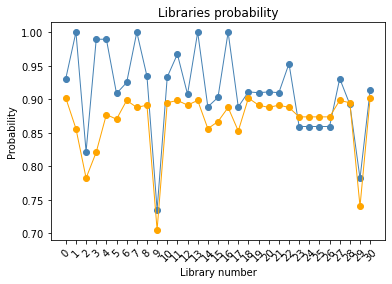

In [53]:
import matplotlib
import matplotlib.pyplot as plt

print(max(train_for_graph))
print(max(test_for_graph))
plt.plot(range(len(train_for_graph)), train_for_graph, marker = "o", linewidth = 1, color = 'steelblue')
plt.plot(range(len(test_for_graph)), test_for_graph, marker = "o", linewidth = 1, color = 'orange')

plt.xlabel('Library number')
plt.ylabel('Probability')
plt.xticks(range(len(train_for_graph)), rotation = 45)
plt.title('Libraries probability')
plt.style.use('default')
plt.yticks()
plt.style.use('ggplot')
plt.show()

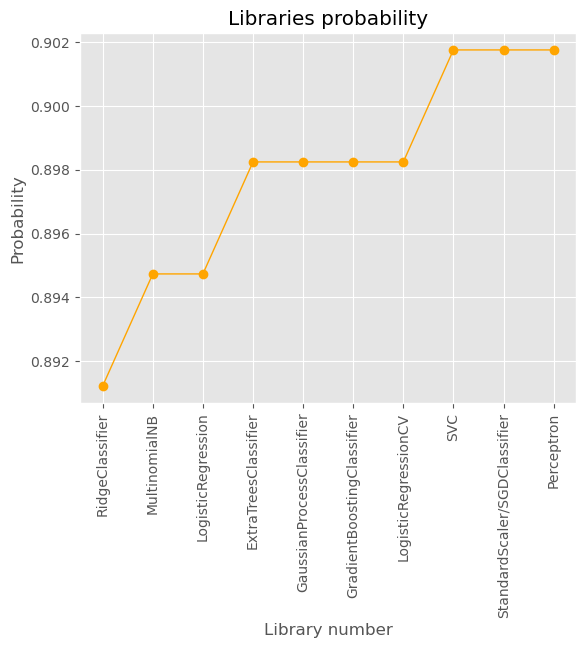

In [54]:
Product = models_names_graph
Quantity = test_for_graph

df = pd.DataFrame(dict(names=Product, marks=Quantity))
df_sorted = df.sort_values('marks')

plt.plot(range(len(df_sorted.marks[-10:])), df_sorted.marks[-10:], marker = "o", linewidth = 1, color = 'orange')

plt.xlabel('Library number')
plt.ylabel('Probability')
plt.xticks(range(len(df_sorted.marks[-10:])), df_sorted.names[-10:], rotation = 90)

plt.title('Libraries probability')
plt.style.use('default')
plt.yticks()
plt.style.use('ggplot')
plt.show()

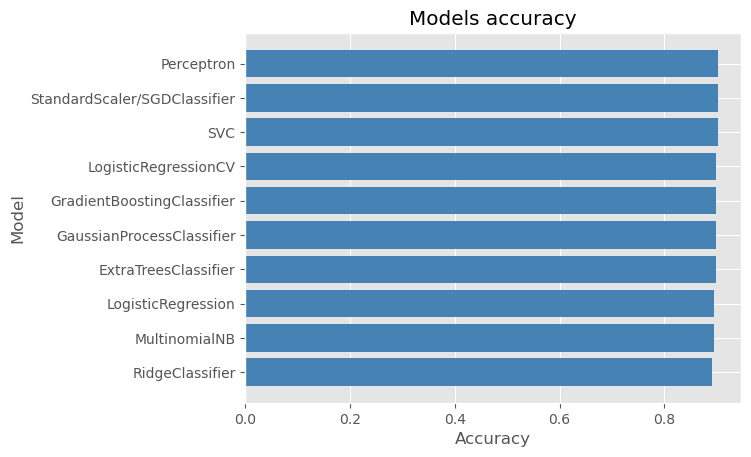

In [55]:
import matplotlib.pyplot as plt
   
Product = models_names_graph
Quantity = test_for_graph

df = pd.DataFrame(dict(names=Product, marks=Quantity))
df_sorted = df.sort_values('marks')

plt.barh(df_sorted.names[-10:], df_sorted.marks[-10:], color='steelblue')
plt.title('Models accuracy')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.show()

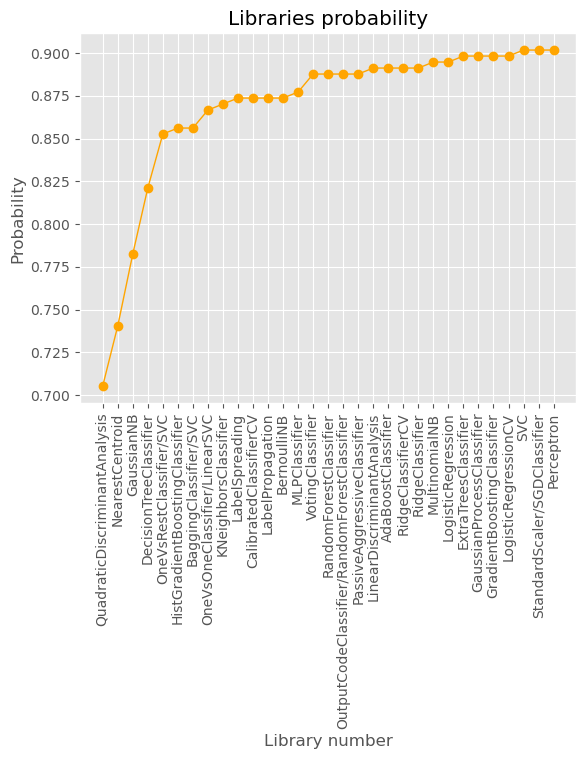

In [56]:
df = pd.DataFrame(dict(names=Product, marks=Quantity))
df_sorted = df.sort_values('marks')

plt.plot(range(len(df_sorted.marks)), df_sorted.marks, marker = "o", linewidth = 1, color = 'orange')

plt.xlabel('Library number')
plt.ylabel('Probability')
plt.xticks(range(len(df_sorted.marks)), df_sorted.names, rotation = 90)

plt.title('Libraries probability')
plt.style.use('default')
plt.yticks()
plt.style.use('ggplot')
plt.show()

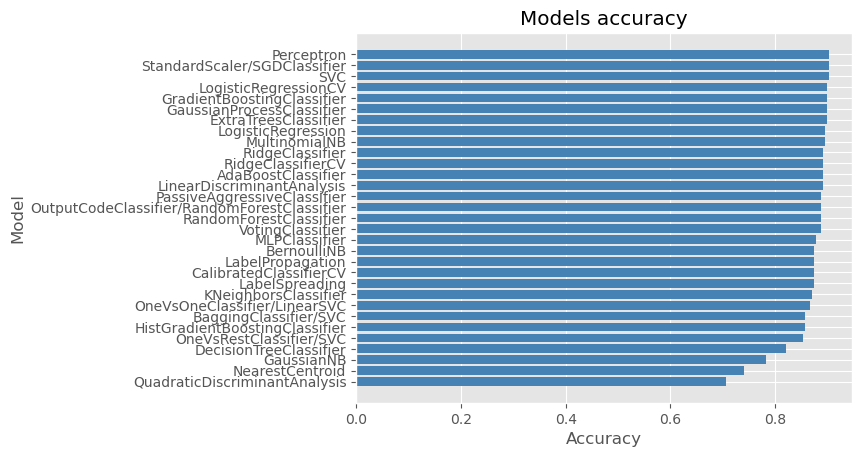

In [57]:
import matplotlib.pyplot as plt
   
Product = models_names_graph
Quantity = test_for_graph

df = pd.DataFrame(dict(names=Product, marks=Quantity))
df_sorted = df.sort_values('marks')

plt.barh(df_sorted.names, df_sorted.marks, color='steelblue')
plt.title('Models accuracy')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.show()

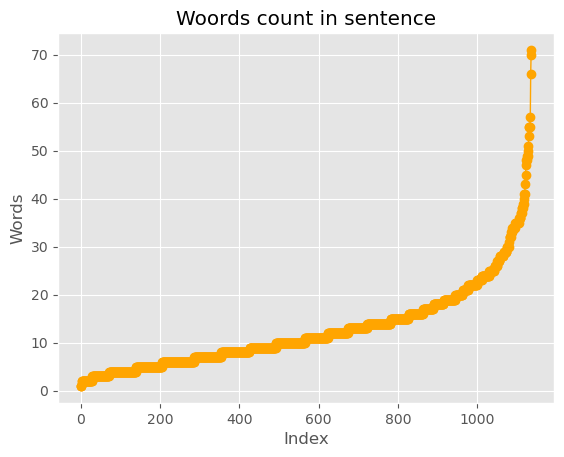

In [58]:
df = pd.DataFrame(dict(names=df3.index, marks=df3.words))
df_sorted = df.sort_values('marks')

plt.plot(range(len(df_sorted.marks)), df_sorted.marks, marker = "o", linewidth = 1, color = 'orange')

plt.xlabel('Index')
plt.ylabel('Words')
plt.xticks()

plt.title('Woords count in sentence')
plt.style.use('default')
plt.yticks()
plt.style.use('ggplot')
plt.show()

In [59]:
#L1-based feature selection

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)



from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
#train_for_graph.append(train_acc)
#test_for_graph.append(test_acc)
#models_names_graph.append('LogisticRegression')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1]
train_acc:  0.9144196951934349
test_acc:  0.8771929824561403


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jenga\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#Removing features with low variance

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new = sel.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)



from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
#train_for_graph.append(train_acc)
#test_for_graph.append(test_acc)
#models_names_graph.append('LogisticRegression')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1]
train_acc:  0.9261430246189918
test_acc:  0.9228070175438596


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#Univariate feature selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)



from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
#train_for_graph.append(train_acc)
#test_for_graph.append(test_acc)
#models_names_graph.append('LogisticRegression')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1]
train_acc:  0.7702227432590856
test_acc:  0.7684210526315789


In [62]:
#Tree-based feature selection

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)



from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
#train_for_graph.append(train_acc)
#test_for_graph.append(test_acc)
#models_names_graph.append('LogisticRegression')

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

C:\Users\jenga\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1]
train_acc:  0.9261430246189918
test_acc:  0.9017543859649123
